In [6]:
import quimb as qu
import quimb.tensor as qtn
import matplotlib.pyplot as plt
import numpy as np
import cotengra as ctg

from quimb.tensor.tensor_dmrg import DMRG2

from mera_hubbard import FH_Hamiltonian_NN, solve_ground_state_half_filling

In [7]:
num_sites = 4
t1 = 1.
t2 = 0.3 # trying without the NN terms first, as additional check
U = 4

In [8]:
# FH HAMILTONIAN
ham, sparse_ham = FH_Hamiltonian_NN(num_sites, t1, t2, U, pbc=0) # pbc=0: open BC, pbc=1: cyclic BC
ham.show()
_, en, _ = solve_ground_state_half_filling(num_sites, ham, sparse_ham)

SparseOperatorBuilder(nsites=8, nterms=24, locality=3))
+ - . . . . . .  -1.0
- + . . . . . .  -1.0
. . . . + - . .  -1.0
. . . . - + . .  -1.0
. + - . . . . .  -1.0
. - + . . . . .  -1.0
. . . . . + - .  -1.0
. . . . . - + .  -1.0
. . + - . . . .  -1.0
. . - + . . . .  -1.0
. . . . . . + -  -1.0
. . . . . . - +  -1.0
+ z - . . . . .  -0.3
- z + . . . . .  -0.3
. . . . + z - .  -0.3
. . . . - z + .  -0.3
. + z - . . . .  -0.3
. - z + . . . .  -0.3
. . . . . + z -  -0.3
. . . . . - z +  -0.3
n . . . n . . .  +4.0
. n . . . n . .  +4.0
. . n . . . n .  +4.0
. . . n . . . n  +4.0
energy =  -1.959513703909538
number of particles =  4.0


In [9]:
# However, the ground state without taking into account the constraint on the number of particles is...
en_noconstraints, vk = qu.eigh(sparse_ham, k=1, backend="AUTO")
en_noconstraints

array([-3.12871789])

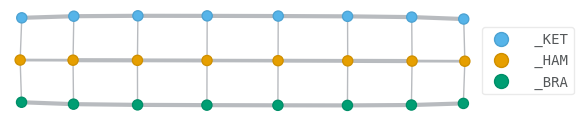

In [10]:
# DMRG energy - it needs the MPO form of the Hamiltonian!!
ham_MPO = ham.build_mpo()
dmrg = DMRG2(ham_MPO)
dmrg.TN_energy.draw(color=['_KET', '_HAM', '_BRA'], show_inds=False, show_tags=False)  # might be slow as uses force repulsion

In [11]:
dmrg.solve(max_sweeps=20, verbosity=1, cutoffs=1e-6)

1, R, max_bond=(8/8), cutoff:1e-06


100%|#############################################| 7/7 [00:01<00:00,  6.54it/s]

Energy: -3.128717774054421 ... not converged.
2, R, max_bond=(5/16), cutoff:1e-06



100%|############################################| 7/7 [00:00<00:00, 672.87it/s]

Energy: -3.12871788890837 ... converged!


True

In [12]:
assert np.isclose(dmrg.energy,en_noconstraints[0], atol=1.e-8), "The energies are different!"